In [5]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

path = './data'

file_list = [os.path.join(root, file) for root, dirs, files in os.walk(path) for file in files if file.endswith('.nc')]

time_info = {}

for file in file_list:
    try:
        ds = xr.open_dataset(file, engine='netcdf4')
        if 'time' in ds.sizes:
            time_dim = ds.sizes['time']
            time_values = ds['time'].values
            earliest_time = time_values.min()
            latest_time = time_values.max()
            time_info[file] = {'dimension': time_dim, 'earliest': earliest_time, 'latest': latest_time}
        else:
            time_info[file] = {'dimension': 'No time dimension', 'earliest': 'N/A', 'latest': 'N/A'}
        ds.close()  
    except Exception as e:
        time_info[file] = {'dimension': 'Error reading file', 'earliest': str(e), 'latest': str(e)}


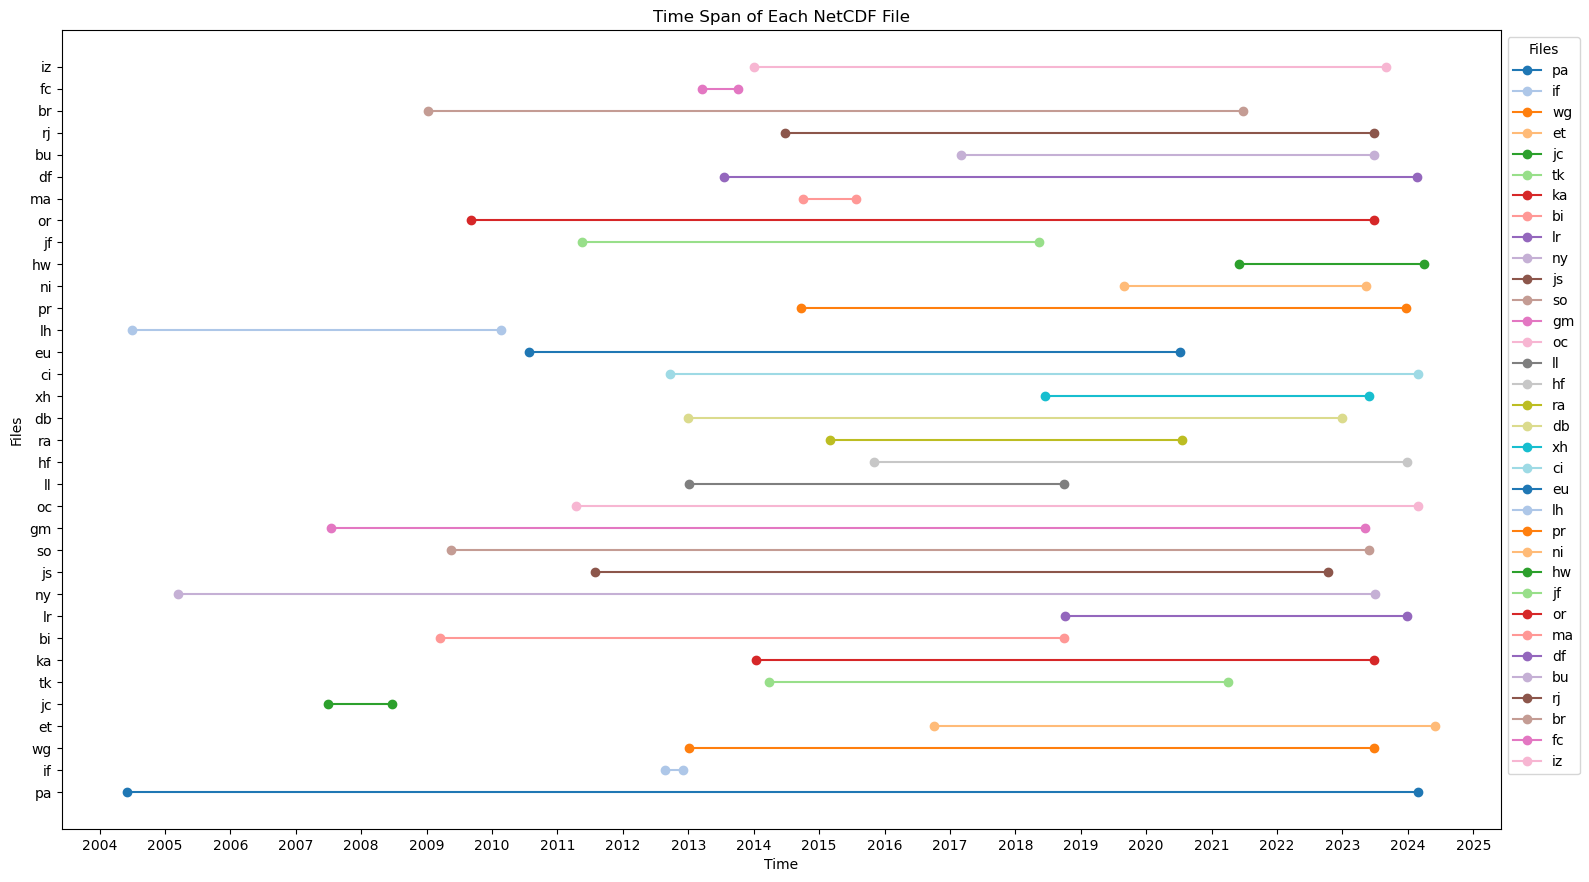

In [17]:
import itertools
fig, ax = plt.subplots(figsize=(16, 9))

file_index = 0

colors = itertools.cycle(plt.cm.tab20.colors)

for file, info in time_info.items():
    if info['earliest'] != 'N/A' and info['latest'] != 'N/A':
        color = next(colors)
        ax.plot([info['earliest'], info['latest']], [file_index, file_index], marker='o', color=color,label=file[7:9])
        file_index += 1

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.legend(title='Files', loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('Time Span of Each NetCDF File')
ax.set_xlabel('Time')
ax.set_ylabel('Files')

ax.set_yticks(range(file_index))
ax.set_yticklabels([file[7:9] for file in time_info.keys()])

plt.tight_layout()
plt.show()